In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import sqlite3
data = pd.read_csv('/kaggle/input/nutrition-facts/menu.csv')
conn = sqlite3.connect('McDonalds.db')
data.to_sql('MCDONALDS_NUTRITION', conn)

/kaggle/input/nutrition-facts/menu.csv


260

In [4]:
# using pandas
df = pd.read_sql('SELECT * FROM MCDONALDS_NUTRITION', conn)
df

,index,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,...,31,10,4,17,3,17,10,0,25,15
1,1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,...,30,10,4,17,3,18,6,0,25,8
2,2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,...,29,10,4,17,2,14,8,0,25,10
3,3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,...,30,10,4,17,2,21,15,0,30,15
4,4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,...,30,10,4,17,2,21,6,0,25,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,255,Smoothies & Shakes,McFlurry with Oreo Cookies (Small),10.1 oz (285 g),510,150,17.0,26,9.0,44,...,80,27,1,4,64,12,15,0,40,8
256,256,Smoothies & Shakes,McFlurry with Oreo Cookies (Medium),13.4 oz (381 g),690,200,23.0,35,12.0,58,...,106,35,1,5,85,15,20,0,50,10
257,257,Smoothies & Shakes,McFlurry with Oreo Cookies (Snack),6.7 oz (190 g),340,100,11.0,17,6.0,29,...,53,18,1,2,43,8,10,0,25,6
258,258,Smoothies & Shakes,McFlurry with Reese's Peanut Butter Cups (Medium),14.2 oz (403 g),810,290,32.0,50,15.0,76,...,114,38,2,9,103,21,20,0,60,6


In [5]:
df.head()

,index,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,...,31,10,4,17,3,17,10,0,25,15
1,1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,...,30,10,4,17,3,18,6,0,25,8
2,2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,...,29,10,4,17,2,14,8,0,25,10
3,3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,...,30,10,4,17,2,21,15,0,30,15
4,4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,...,30,10,4,17,2,21,6,0,25,10


In [6]:
# learning about the data
df.describe(include = 'all')

,index,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,260.000000,260,260,260,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,...,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
unique,NaN,9,260,107,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Coffee & Tea,Egg McMuffin,16 fl oz cup,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,95,1,45,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,129.500000,NaN,NaN,NaN,368.269231,127.096154,14.165385,21.815385,6.007692,29.965385,...,47.346154,15.780769,1.630769,6.530769,29.423077,13.338462,13.426923,8.534615,20.973077,7.734615
std,75.199734,NaN,NaN,NaN,240.269886,127.875914,14.205998,21.885199,5.321873,26.639209,...,28.252232,9.419544,1.567717,6.307057,28.679797,11.426146,24.366381,26.345542,17.019953,8.723263
min,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,64.750000,NaN,NaN,NaN,210.000000,20.000000,2.375000,3.750000,1.000000,4.750000,...,30.000000,10.000000,0.000000,0.000000,5.750000,4.000000,2.000000,0.000000,6.000000,0.000000
50%,129.500000,NaN,NaN,NaN,340.000000,100.000000,11.000000,17.000000,5.000000,24.000000,...,44.000000,15.000000,1.000000,5.000000,17.500000,12.000000,8.000000,0.000000,20.000000,4.000000
75%,194.250000,NaN,NaN,NaN,500.000000,200.000000,22.250000,35.000000,10.000000,48.000000,...,60.000000,20.000000,3.000000,10.000000,48.000000,19.000000,15.000000,4.000000,30.000000,15.000000


### Which Food item has the maximum sodium content?

- Main source of sodium is Table salt

- Average American eats 5 teaspoons/day. This is about 20x as much as the body needs

- Sodium mostly added during preparation

- Foods that don't taste salty may be high in Sodium, large amounts can be hidden in canned, processed and convenient foods.

- Sodium controls fluids balance in our bodies and maintains blod volume and blood pressure

- Too much sodium may raise blood pressure and cause fluid retention, which would lead to swelling of the legs and feet or other health issues

- Target less than 2,000 milligrams of Sodium per day


### Which food item has maximum sodium content?

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 48.1% of the points cannot be placed; you may want to decrease the size of the mar

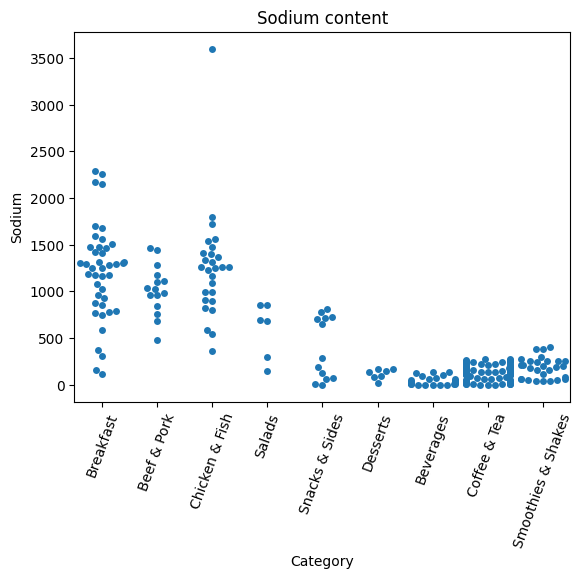

In [12]:
## categorical scatterplots
plot = sns.swarmplot(x='Category', y='Sodium', data=df)
plt.setp(plot.get_xticklabels(), rotation=70)
plt.title('Sodium content')
plt.show()


### WHich food item has maximum sodium content?

In [13]:
# To check the values of Sodium levels in the food item within the dataset
df['Sodium'].describe()

count     260.000000
mean      495.750000
std       577.026323
min         0.000000
25%       107.500000
50%       190.000000
75%       865.000000
max      3600.000000
Name: Sodium, dtype: float64

In [16]:
# Exploring the row associated with the maximum sodium variable
df['Sodium'].idxmax()

82

In [18]:
# Finding the item name associated with the 82nd item in our data frame
df.at[82, 'Item']

'Chicken McNuggets (40 piece)'

Creating a scatterplot to find the relationship between Protein and Total Fat

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


AttributeError: 'JointGrid' object has no attribute 'show'

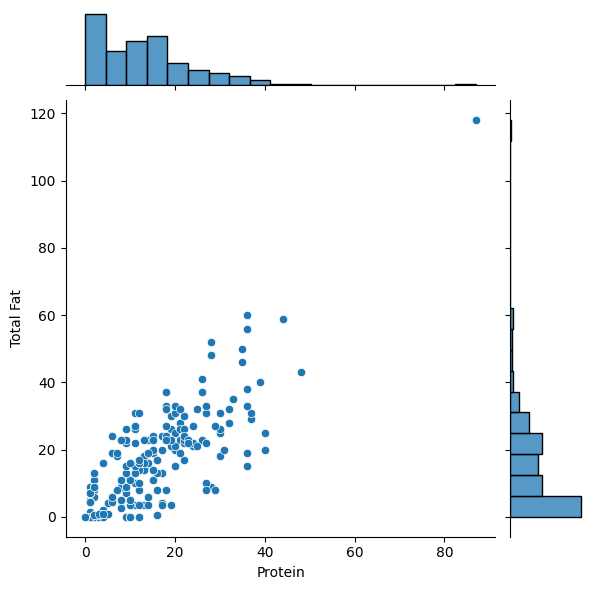

In [19]:
plot = sns.jointplot(x="Protein", y='Total Fat', data=df)
plot.show()

Viz data using Box plots, Box plots indicated the distribution of one or more variables

AttributeError: 'NoneType' object has no attribute 'show'

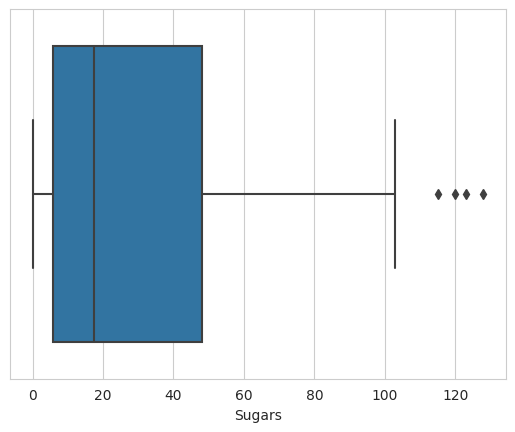

In [20]:
plot = sns.set_style("whitegrid")
ax = sns.boxplot(x=df["Sugars"])
plot.show()

### Notice a few outliers that indicate food items with extreme values of Sugar

### Food items in the dataset has sugar content of around 128g

### Candies maybe among these high sugar content food items on the menu